# Example 11.4 (pag 539)

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import LeaveOneOut
import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

TABS_DIR = Path("../tests/data")

df = pd.read_csv(TABS_DIR / "tab_11_16.csv")
df

,x,R,Temperature
0,0.056,0.062,338.07
1,0.095,0.013,1613.04
2,0.077,0.062,335.91
3,0.095,0.061,327.82
4,0.090,0.037,449.23
5,0.072,0.038,440.58
6,0.064,0.015,1173.82
7,0.050,0.000,1140.36
8,0.050,0.035,453.83
9,0.079,0.000,1261.39


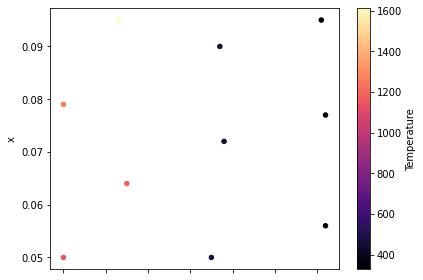

In [2]:
# Compare with Figure 11.38
df.plot(kind='scatter', x='R', y='x', c='Temperature', cmap="magma")
plt.tight_layout()
plt.show()

In [3]:
x = df[['R','x']]
y = df['Temperature']
gpr = GaussianProcessRegressor()
gpr.fit(x.values,y.values)

GaussianProcessRegressor()

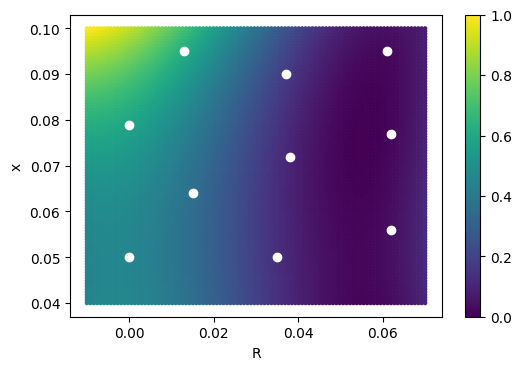

In [4]:
x1_range = np.linspace(-0.01, 0.07, 100)
x2_range = np.linspace(0.04, 0.1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
X1, X2 = X1.flatten(), X2.flatten()
fig = plt.figure(dpi=100)
plt.scatter(X1, X2, c=gpr.predict(np.array([X1,X2]).T), s=5)
plt.scatter(df['R'],df['x'], c='w')
plt.xlabel('R')
plt.ylabel('x')
plt.colorbar()
plt.show()


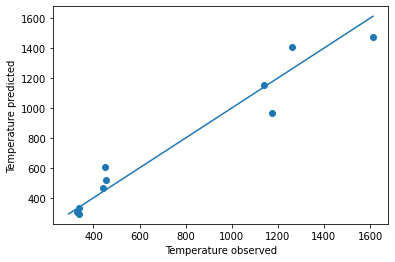

In [5]:
# Parity plot
y_pred = gpr.predict(x.values)
allval = list(y)+list(y_pred)
plt.scatter(y,y_pred)
plt.plot([min(allval), max(allval)], [min(allval), max(allval)])
plt.xlabel('Temperature observed')
plt.ylabel('Temperature predicted')
plt.show()

## Jackknife prediction
i.e., for each prediction exclude that observation from the training set 

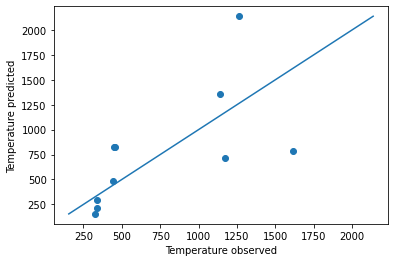

In [6]:
loo = LeaveOneOut()
y_pred = []
for train_index, test_index in loo.split(x.values):
    x_train, x_test = x.values[train_index], x.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    gpr = GaussianProcessRegressor()
    gpr.fit(x_train,y_train)
    y_pred.append(gpr.predict(x_test))

allval = list(y)+list(y_pred)
plt.scatter(y,y_pred)
plt.plot([min(allval), max(allval)], [min(allval), max(allval)])
plt.xlabel('Temperature observed')
plt.ylabel('Temperature predicted')
plt.show()
